---
image: geopandas2.png 
title: Proximity Analysis 
subtitle: Data analysis with GeoPandas 
date: '2023-01-07' 
categories: [Python, GeoPandas, Proximity Analysis] 
author: Kunal Khurana 
jupyter: python3 
toc: True
---

## Techniques

> __measure distance__ between points on map

> select all points within same radius

In [2]:
import folium
from folium import Marker, GeoJson
from folium.plugins import HeatMap
from shapely.geometry import MultiPolygon

import math
import pandas as pd
import geopandas as gpd


In [5]:
releases = gpd.read_file('data_for_all_courses\\toxic_release_pennsylvania\\toxic_release_pennsylvania.shp')
releases.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [31]:
releases.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   YEAR        4663 non-null   object  
 1   CITY        4663 non-null   object  
 2   COUNTY      4663 non-null   object  
 3   ST          4663 non-null   object  
 4   LATITUDE    4663 non-null   float64 
 5   LONGITUDE   4663 non-null   float64 
 6   CHEMICAL    4663 non-null   object  
 7   UNIT_OF_ME  4663 non-null   object  
 8   TOTAL_RELE  4663 non-null   float64 
 9   geometry    4663 non-null   geometry
dtypes: float64(3), geometry(1), object(6)
memory usage: 364.4+ KB


In [19]:
# air quality data
stations = gpd.read_file('data_for_all_courses\\toxic_release_pennsylvania.shx')
stations.head()

,geometry
0,POINT (2718560.227 256380.179)
1,POINT (2698674.606 224522.905)
2,POINT (2676833.394 261701.856)
3,POINT (2684030.004 221697.388)
4,POINT (2684030.004 221697.388)


In [12]:
stations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  4663 non-null   geometry
dtypes: geometry(1)
memory usage: 36.6 KB


In [17]:
stations2 = gpd.read_file('data_for_all_courses\\toxic_release_pennsylvania.shp')
stations2.head()

,geometry
0,POINT (2718560.227 256380.179)
1,POINT (2698674.606 224522.905)
2,POINT (2676833.394 261701.856)
3,POINT (2684030.004 221697.388)
4,POINT (2684030.004 221697.388)


In [2]:
stations3 = gpd.read_file('data_for_all_courses\\toxic_release_pennsylvania.dbf')
stations3.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [3]:
stations3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   YEAR        4663 non-null   object  
 1   CITY        4663 non-null   object  
 2   COUNTY      4663 non-null   object  
 3   ST          4663 non-null   object  
 4   LATITUDE    4663 non-null   float64 
 5   LONGITUDE   4663 non-null   float64 
 6   CHEMICAL    4663 non-null   object  
 7   UNIT_OF_ME  4663 non-null   object  
 8   TOTAL_RELE  4663 non-null   float64 
 9   geometry    4663 non-null   geometry
dtypes: float64(3), geometry(1), object(6)
memory usage: 364.4+ KB


In [22]:
# checking crs coordinates for both
print(stations3.crs)
print(releases.crs)

None
EPSG:2272


In [24]:
#  stations3 = stations3.set_crs
stations3 = stations3.set_crs(epsg=2272, inplace=True)


In [26]:
# checking crs coordinates for both
print(stations3.crs)
print(releases.crs)

EPSG:2272
EPSG:2272


In [28]:
# select one release incident in particular
recent_release = releases.iloc[360]

# measure distances from each station
distances = stations3.geometry.distance(recent_release.geometry)
distances

0       48941.110275
1       14914.687505
2       40646.631420
3           0.000000
4           0.000000
            ...     
4658    41735.245165
4659    40909.967527
4660     4519.771240
4661    32442.454868
4662    20534.504851
Length: 4663, dtype: float64

In [30]:
# mean distance
print(f'Mean distance to monitoring stations: {distances.mean()} feet')

Mean distance to monitoring stations: 35350.82207483399 feet


In [34]:
# print minimum
print(stations3.iloc[distances.idxmin()][['COUNTY', 'LATITUDE', 'LONGITUDE']])

COUNTY       PHILADELPHIA
LATITUDE         39.91354
LONGITUDE       -75.19889
Name: 3, dtype: object


## Creating a buffer

> to understand some points on the map that are some distance away from the reference point

> use __folium.GeoJson()__ to plot each polygon

In [4]:
two_mile_buffer = stations3.geometry.buffer(2*5280)
two_mile_buffer.head()

0    POLYGON ((2729120.227 256380.179, 2729069.378 ...
1    POLYGON ((2709234.606 224522.905, 2709183.756 ...
2    POLYGON ((2687393.394 261701.856, 2687342.544 ...
3    POLYGON ((2694590.004 221697.388, 2694539.155 ...
4    POLYGON ((2694590.004 221697.388, 2694539.155 ...
dtype: geometry

In [15]:
# create base map
m = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
HeatMap(data = releases[["LATITUDE", 'LONGITUDE']], radius= 12).add_to(m)

for idx, row in stations3.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m)
    
# plot
GeoJson(two_mile_buffer.set_crs(epsg=2272)).add_to(m)


# show
#m

Type:  <class 'shapely.geometry.multipolygon.MultiPolygon'>


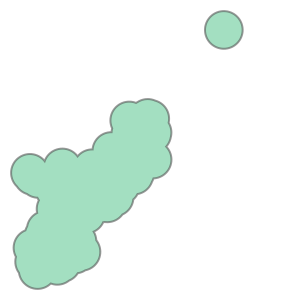

In [17]:
# turn a group of polygons into a single polygon

my_union = two_mile_buffer.geometry.unary_union
print('Type: ', type(my_union))

# show
my_union